# [2022 Fall] Assignment4-9

> Course: AP3021

### 4-9

Please write Python codes to determine the height of temperature inversion? (data is in the eeclass)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
""" Data type:
stno: Observation's Number (Length: 6 digits)
yyyymmddhh: UTC Time, yyyy: year, mm: month, dd: day, hh: hour (Length: 11 digits)
Si: Significant Code (Length: 3 digits)
Press: Pressure (Uint: hpa, Length: 7 digits)
Heigh: Geopotential Height (Unit: gpm, Length: 6 digits)
Tx: Temperature (Unit: degrees Celsius, Length: 6 digits)
Td: Dew Point (Unit: degrees Celsius, Length: 6 digits)
Wd: Wind Direction (Unit: degrees 360, Length: 4 digits)
Ws: Wind Speed (Unit: m/s, Length: 6 digits)
RH: Relative Humidity (Unit: %, Length: 4 digits)
"""

# Fetch the local path to read the info of the file.
data_path = os.getcwd()
file = "/src/data/20210101_upair.txt"
file_path = f"{data_path}/{file}"


data = pd.read_csv(file_path, skiprows=13, sep="\s+")
data = data.replace(-0.99, 0)
data = data.replace(-9.99, 0)
data = data.replace(-1   , 0)
# stno yyyymmddhh Si  Press Heigh    Tx    Td  Wd    Ws  RH
data.columns = ["stno", "date", "Si", "press", "heigh", "Tx", "Td", "Wd", "Ws", "Rh"]

print(data)

      stno        date  Si   press  heigh    Tx    Td   Wd    Ws  Rh
0   466920  2021010100   6  1010.7    137  10.6   5.0   94   5.1  68
1   466920  2021010100  10  1000.0    224  10.1   4.7   91   6.7  69
2   466920  2021010100   6   970.7    471   8.0   3.8   69   8.8  74
3   466920  2021010100   6   925.1    866   4.6   2.7   67  11.9  87
4   466920  2021010100  10   925.0    867   4.6   2.7   67  11.9  87
..     ...         ...  ..     ...    ...   ...   ...  ...   ...  ..
63  466920  2021010100   2    97.0  16676 -84.6 -90.9  260  37.3  34
64  466920  2021010100   2    87.8  17228 -85.0 -91.8  273  33.5  31
65  466920  2021010100   2    84.5  17444 -79.0 -88.1  281  30.2  22
66  466920  2021010100   6    82.3  17591 -79.4 -87.9  288  28.0  25
67  466920  2021010100  20    76.9  17983 -76.1 -85.9  263  26.2  21

[68 rows x 10 columns]


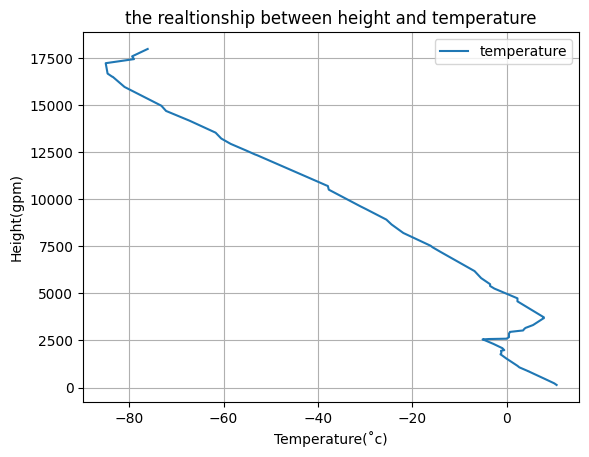

In [3]:
# At first we observe the realtionship between height and temperature

plt.plot(data["Tx"], data["heigh"])

plt.xlabel("Temperature(˚c)")
plt.ylabel("Height(gpm)")
plt.title("the realtionship between height and temperature")

plt.grid()
plt.legend(["temperature"], loc ="upper right")
plt.savefig("src/imgs/A4_9_1.jpg", dpi = 300)

plt.show()

Height: 1761 Temperature inversion: -1.3
Height: 1951 Temperature inversion: -1.2
Height: 2556 Temperature inversion: -5.1
Height: 2577 Temperature inversion: -3.8
Height: 2595 Temperature inversion: 0.0
Height: 2872 Temperature inversion: 0.5
Height: 2955 Temperature inversion: 0.7
Height: 3009 Temperature inversion: 2.6
Height: 3032 Temperature inversion: 3.5
Height: 3100 Temperature inversion: 3.7
Height: 3167 Temperature inversion: 4.0
Height: 3319 Temperature inversion: 5.6
Height: 3675 Temperature inversion: 7.8
Height: 17228 Temperature inversion: -85.0
Height: 17591 Temperature inversion: -79.4


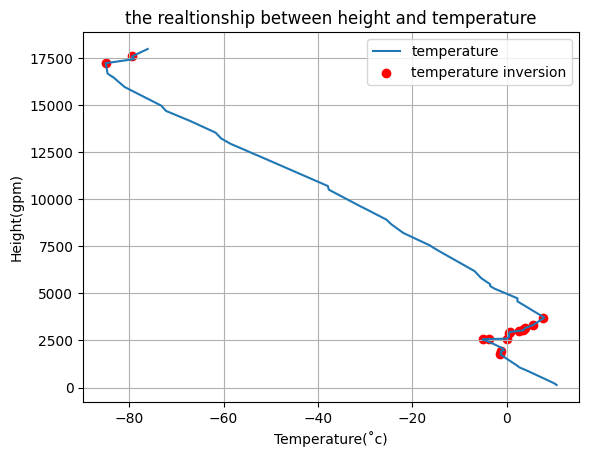

In [4]:
# the key point we need is height and the temperature

data_num = len(data)
inversion_happen = []
x = []
y = []

for i in range(0, data_num) :
    if (i == data_num - 1) :
        break

    if (data["Tx"][i] < data["Tx"][i + 1]) :
        inversion_happen.append(i)
        print("Height:", data["heigh"][i], "Temperature inversion:", data["Tx"][i])
        x.append(data["Tx"][i])
        y.append(data["heigh"][i])


plt.plot(data["Tx"], data["heigh"])
plt.scatter(x, y, c='red')

plt.xlabel("Temperature(˚c)")
plt.ylabel("Height(gpm)")
plt.title("the realtionship between height and temperature")

plt.grid()
plt.legend(["temperature", "temperature inversion"], loc ="upper right")
plt.savefig("src/imgs/A4_9_2.jpg", dpi = 300)

plt.show()

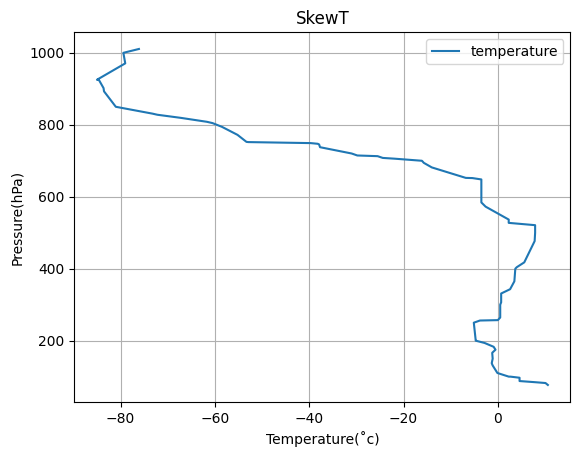

In [5]:
y = data["press"].iloc[::-1]
plt.plot(data["Tx"], y)
plt.xlabel("Temperature(˚c)")
plt.ylabel("Pressure(hPa)")
plt.title("SkewT")

plt.grid()
plt.legend(["temperature", "temperature inversion"], loc ="upper right")
plt.savefig("src/imgs/A4_9_3.jpg", dpi = 300)

plt.show()